# <p style="padding:10px;background-color:#e0301e;margin:0;color:#FFFFFF;font-family:newtimeroman;text-align:center;border-radius:8px;overflow:hidden;font-weight:500;font-size:28px;">📈 CUSTOMER CHURN PREDICTION 📉</p>


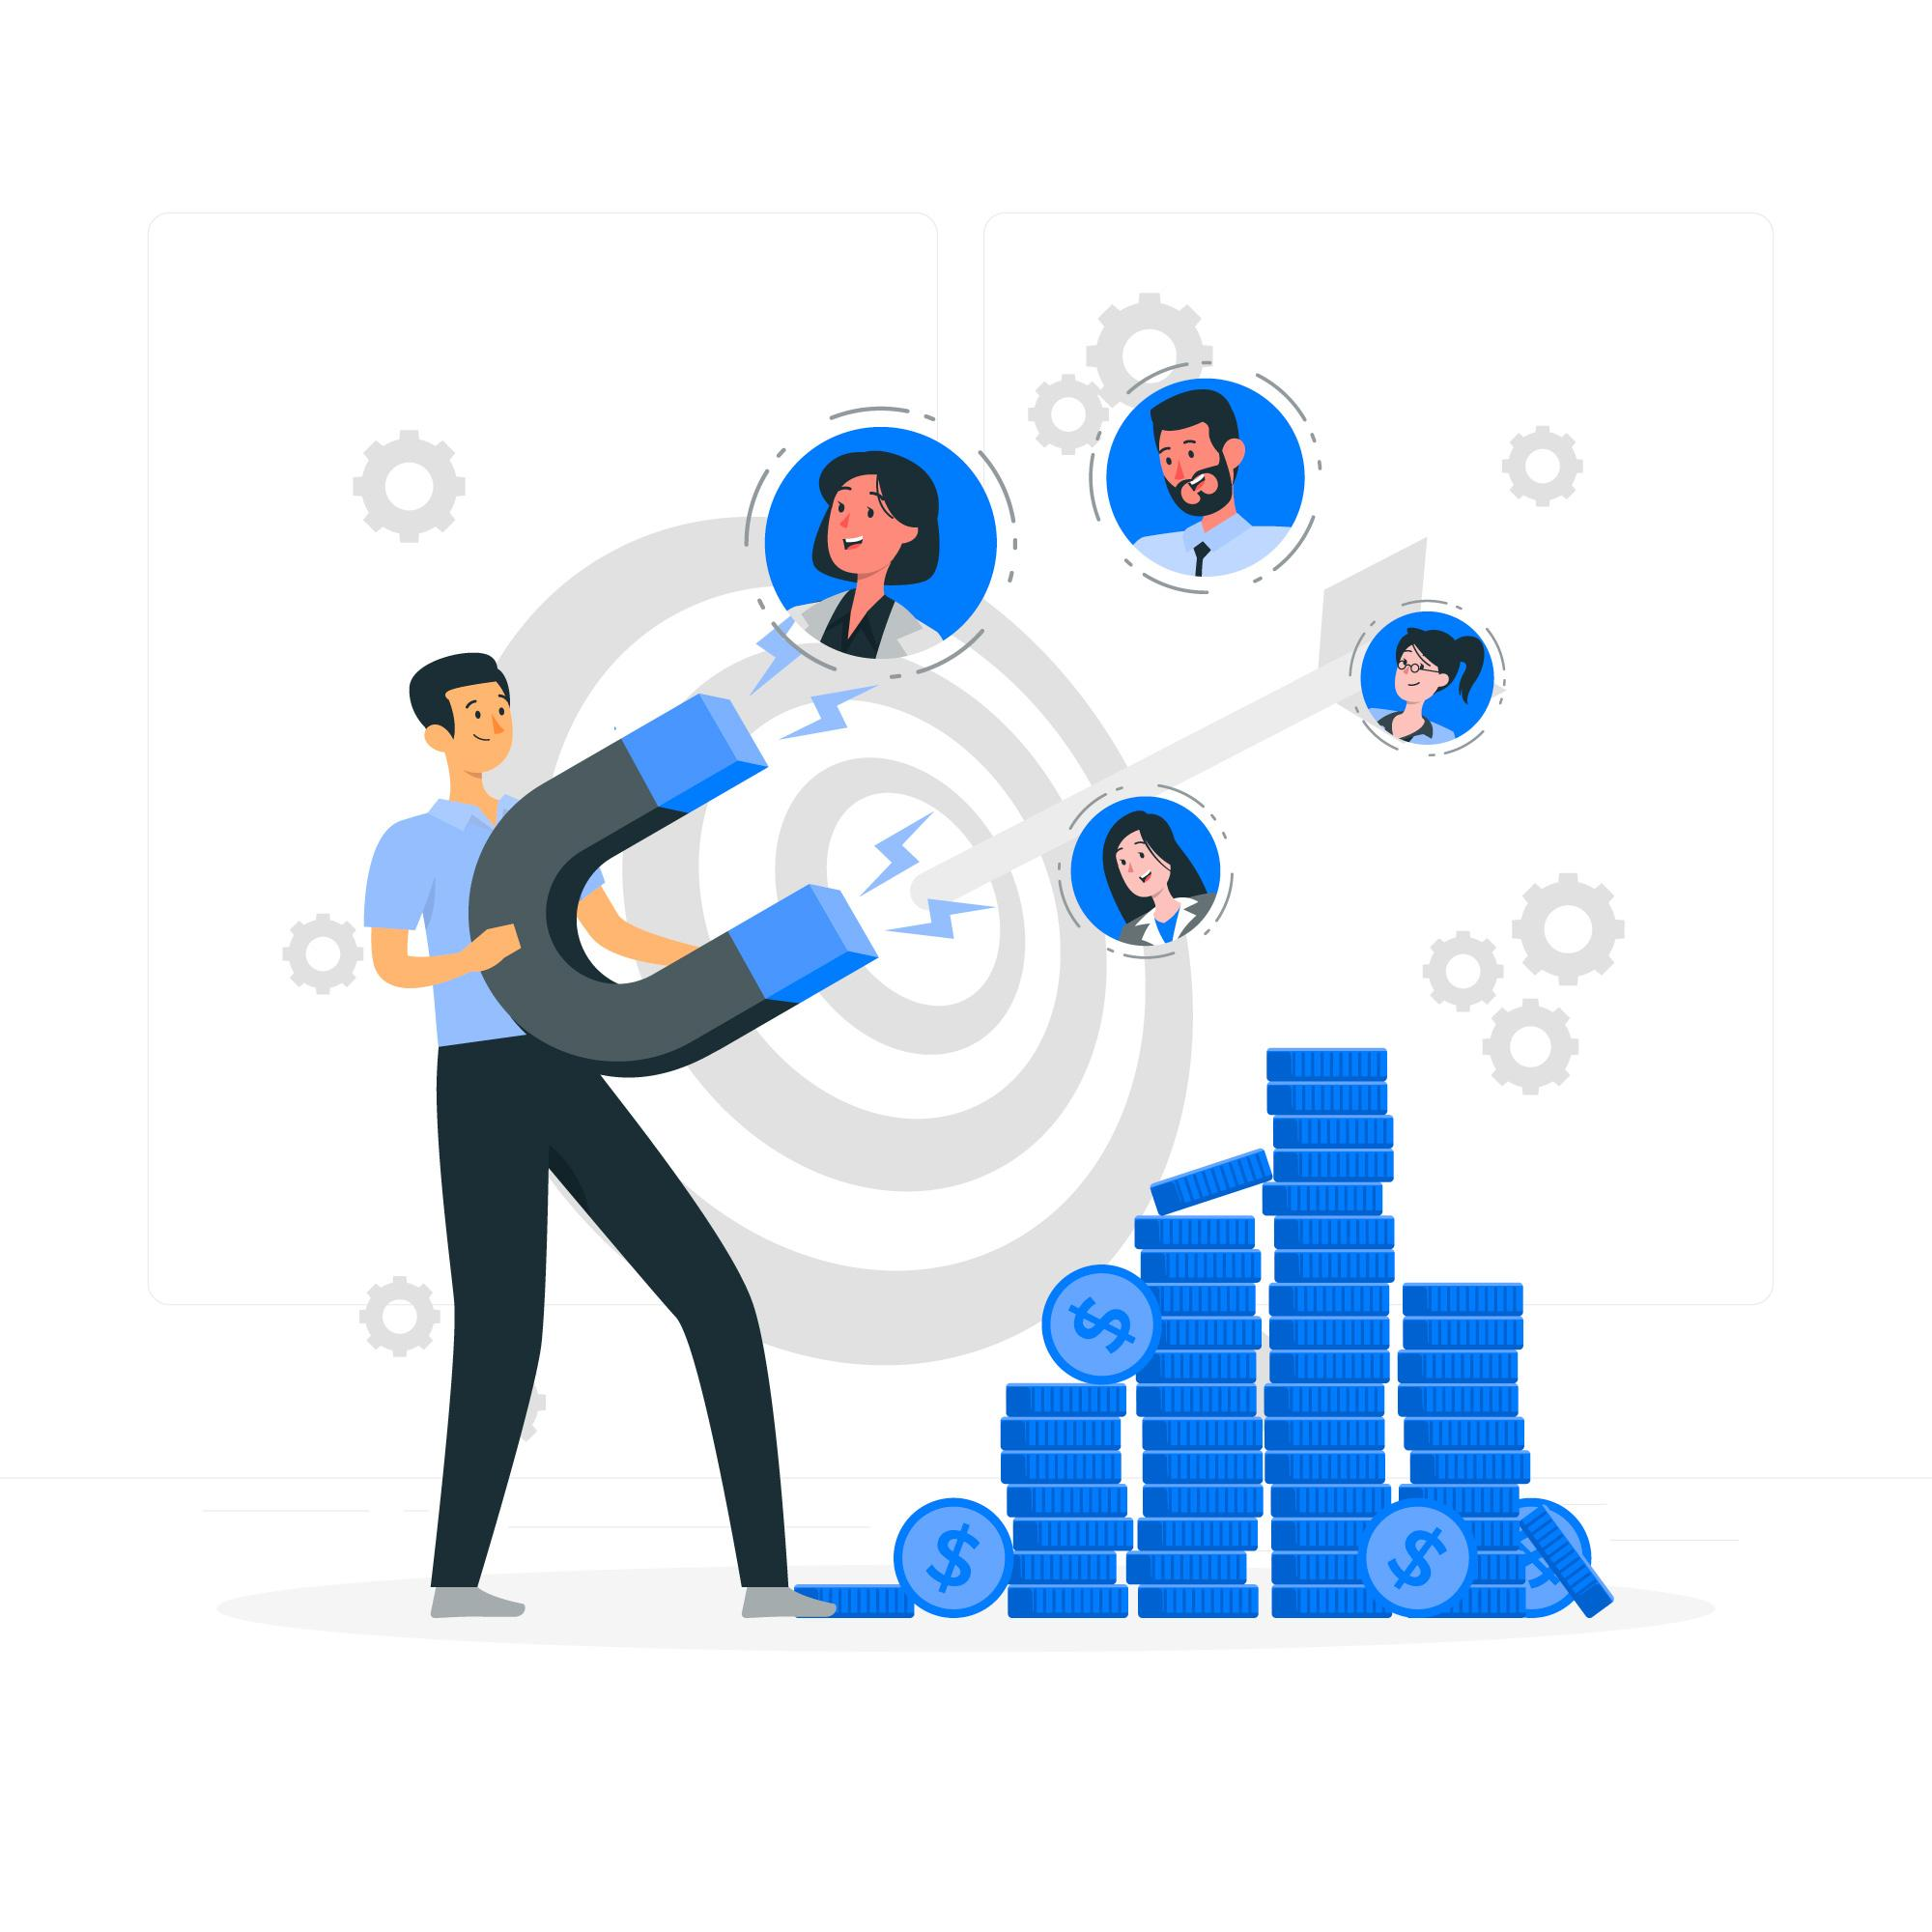


# <span style="font-family:serif; font-size:24px;">Table of Contents</span>

1. [Introduction](#1)
    * [What is Customer Churn?](#2)
    * [How to address and reduce Customer Churn?](#3)
    * [Objectives in this Analysis](#4)
2. [Loading libraries and Dataset](#5)
3. [Interpreting the Dataset](#6)
4. [Data Cleaning](#8)
5. [Visualizing the Data](#7)
6. [Data Preprocessing](#10)
   * [Scaling and Standardizing Numerical Features](#111)
7. [Machine Learning Model Evaluations and Predictions](#11)
   * [Random Forest](#103)
   * [Logistic Regression](#104)
   * [Decision Tree Classifier](#105)
8. [Conclusion](#15)

***LOAD THE LIB & DATA


***EDA


***Feature eng .-->encoding,rescaling etc


***Feature selection-->corr,iv,vif etc


***model selection


***evalution


***deployment

<a id = "1" ></a>
# <span style="font-family:Georgia, serif; font-size:28px;"> 1. Introduction</span>
<a id = "introduction" ></a>

<a id = "2" ></a>
<span style="font-family:Georgia, serif; font-size:22px;">Customer Churn</span>
<br>
<span style="font-family:Georgia, serif; font-size:15px;">
Customer churn, also known as customer attrition,is when a customer chooses to stop using products or services of a company. But with each customer who churns, there are usually early indicators or metrics that can have been uncovered with churn analysis.</span>

- <span style="font-family:Georgia, serif; font-size:15px;"> For example, The Telecom Industry faces a lot of Churn(With annual churn rate of 15-25%) because the customers can choose from a variety of service providers and actively switch from existing to another.</span>


- <span style="font-family:Georgia, serif; font-size:15px;">  While looking at both Business operational insights (e.g. declining repeat purchases, reduced purchase quantity) and Customer experience insights along the customer feedbacks is foundational in order to predict churn. A scenario where a customer who has declined in recent visits and gives a feedback score of 6 of 10 after their latest shopping experience, could have an increased probability of churning.</span>

- <span style="font-family:Georgia, serif; font-size:15px;">  Generally in a business perspective it costs more to acquire new customers than it does to retain existing customers. In fact, an increase in customer retention of just 5% can create at least a 25% increase in profit. This is because returning customers will likely spend 60% more on a company's products and services. As a result, the company can spend less on the operating costs of having to acquire new customers by spending time and money on convincing an existing customer to select your company over competitors because they've already made their mind.</span>

- <span style="font-family:Georgia, serif; font-size:15px;">  However, if a company could forecast why and which customers are likely to leave ahead of time, it can focus on customer retention efforts only on these "high risk" clients. This helps in achieving the goal of expanding its customer base and retrieve more customers loyalty. </span>


<a id="churn"></a>
<a id = "3" ></a>
<span style="font-family:Georgia, serif; font-size:22px;">How to address and reduce Customer Churn?</span>


<span style="font-family:Georgia, serif; font-size:15px;"> To reduce customer churn, Companies need to predict which customers are at high risk of churn.</span>

- <span style="font-family:Georgia, serif; font-size:15px;">  To detect early signs of potential churn, insight generation of customers and their interactions across numerous channels, including store visits, product purchase history, customer service calls, Web-based transactions, and social media interaction. </span>

- <span style="font-family:Georgia, serif; font-size:15px;">  By providing solution for churn, businesses can preserve their market position,and also grow and thrive with more customers network, the lower the cost of initiation and the larger the profit.</span>


<a id = "4" ></a>
<span style="font-family:Georgia, serif; font-size:22px;">Objectives in this Analysis</span>
<br>
<br>
<span style="font-family:Georgia, serif; font-size:15px;"> Objective is to find solutions and suggestions for any possible churning </span>
- <span style="font-family:Georgia, serif; font-size:15px;">What is the percentage of Customers who are with the active services and Customers who Churn ?
    <br>
- <span style="font-family:Georgia, serif; font-size:15px;"> Does gender play a role in Customers Churn ?</span>
    <br>
- <span style="font-family:Georgia, serif; font-size:15px;"> Does the type of service provided leads to more/less Customers Churn?</span>
    <br>
- <span style="font-family:Georgia, serif; font-size:15px;"> What's the most profitable service types?</span>
    <br>
- <span style="font-family:Georgia, serif; font-size:15px;"> Profitable features and services by the company? </span>
<a id="objective"></a>

___

<a id = "5" ></a>
# <span style="font-family:Georgia, serif; font-size:28px;"> 2. Loading libraries and data</span>
<a id="loading"></a>

<span style="font-family:Georgia, serif; font-size:20px;"> Basic Imports</span>

In [ ]:
import pandas as pd   #manipulation
import numpy as np  #numerical python
import matplotlib.pyplot as plt #visual
import seaborn as sns #visual
import plotly.express as px #visual
import plotly.graph_objects as go #visual
from plotly.subplots import make_subplots #visual
#import warnings  #ignoring warring
#warnings.filterwarnings('ignore')#ignoring warring

In [ ]:
from sklearn.preprocessing import StandardScaler   #resclaing
from sklearn.preprocessing import LabelEncoder #encoding

from sklearn import metrics  #evalution
from sklearn.metrics import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

<span style="font-family:Georgia, serif; font-size:20px;"> Dataset Import</span>

In [ ]:
#loading data
df = pd.read_csv('/content/customer_churn.csv')


___

<a id = "6" ></a>
# <span style="font-family:Georgia, serif; font-size:28px;"> 3. Interpreting the Dataset</span>
<a id = "Undertanding the data" ></a>

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**So, In this Telecom Company's Data we have,**
*  **Churn Column** - *Customers who left recently*

* **Services provided by the company to its customer** – *phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies*

* **Customer's Information Columns** - *Old/New Customer and their Active Period, contract, payment method, paperless billing, monthly charges, and total charges*

* **Customer's Demographic Columns** – *gender, age range, and if they have partners and dependents*

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
a=' '

In [ ]:
a

' '

In [ ]:
id(a)

135264581042480

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

***
<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Data Cleaning </span>
<a id = "8" ></a>

In [ ]:
#Since, we don't need customerID, We drop the column
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Converting Object column to Numerical Column, which is actually holds Numerical data
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')  # in error we can use three thing coerce=instead of blank space put 'NA' ,secon if we use raise he raise the error,if we use ignore then he ignore the error
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Fillna with mean values
df.fillna(df["TotalCharges"].median(),inplace=True)

#or
#Removing missing values
#df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#Removing tenure equal to 0
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [ ]:
#Categorizing Senior Citizen column for encoding
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Finding any absurd values in Numeric Columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
df.describe(include='O') #its not zero its ('O')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [ ]:
#Creating Dataframe for correlation plot
df2 = df
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(df2) #one-hot encoding
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

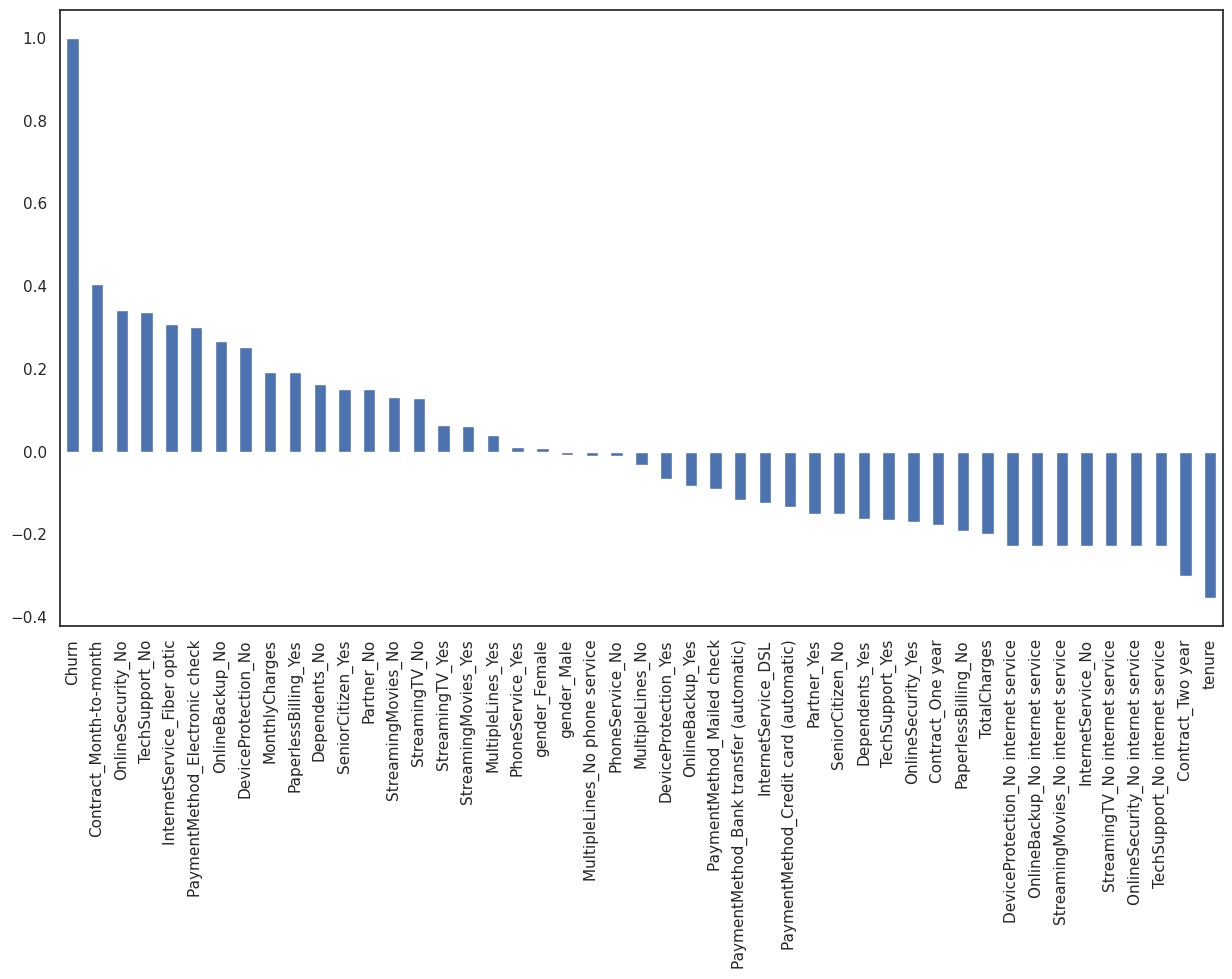

In [ ]:
#Correlation of "Churn" with Features:
plt.figure(figsize=(15,8))
sns.set(style = 'white')

df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

___

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Visualizing The Data </span>
<a id = "missingvalue" ></a>

<span style="font-family:serif; font-size:23px;"> Gender Spread and Churn Distribution </span>


In [ ]:
#homework
gender_labels = ['Male', 'Female']
churn_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=gender_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=churn_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.55, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.83, y=0.5, font_size=20, showarrow=False)])
fig.data[0].marker.colors = ('#7fcdff','#326ada')
fig.data[1].marker.colors = ('#56c175','#ff9b35')

#fig.data[1].marker.color = ('#326ada')
#fig.data[2].marker.color = ('#ff9b35')
#fig.data[3].marker.color = ('#56c175')
fig.show()

* Customers switched from current firm to another firm are 26.6 %.
* Gender Demography among customers are 49.5 % female and 50.5 % male.
---
<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Gender</span>


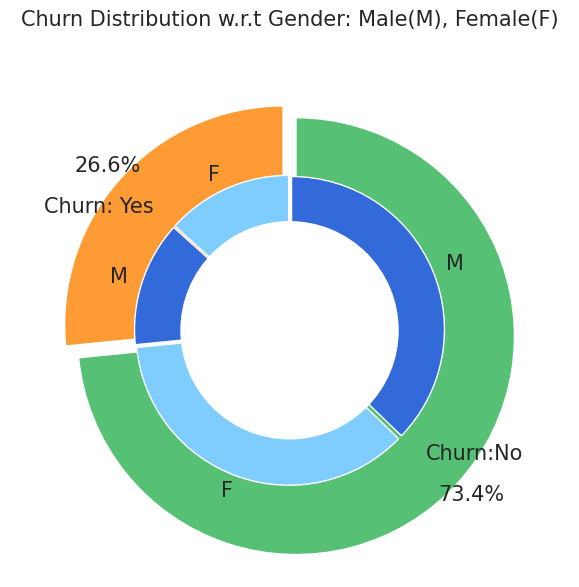

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff9b35', '#56c175']
colors_gender = ['#7fcdff','#326ada', '#7fcdff','#326ada']
explode = (0.4,0.4)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

* There's almost to null differences between the people who churned, as both men and women are churn in equal ratio.
---
<span style="font-family:serif; font-size:23px;"> Contract Distribution w.r.t Churn</span>


In [ ]:
color_discrete_map = {"Month-to-month": "#7fcdff", "One year": "#326ada", "Two year": "#ff9b35"}

fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="Churn Distribution w.r.t Contract", color_discrete_map = color_discrete_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Churn Distribution w.r.t Contract<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* 75% of customer who have Month-to-Month Contract have opted to move out as compared to 13% of customers  who have signed One Year Contract and 3% of customers  who have signed Two Year Contract.

---

<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Payment Method</span>


In [ ]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Churn distribution w.r.t. Customer Payment Method</b>",text_auto=True)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.data[0].marker.color = ('#7fcdff')
fig.data[1].marker.color = ('#326ada')
fig.data[2].marker.color = ('#ff9b35')
fig.data[3].marker.color = ('#56c175')


fig.show()

* Majority of the customers who moved out were having Electronic Check as Payment Method and others who opted for Credit-Card automatic transfer / Bank Automatic Transfer and Mailed Check as Payment Method were less likely to switch.
---

<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Internet Services and Gender</span>


In [ ]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              0        992
Fiber optic      0        910
No               0        717
Fiber optic      1        633
DSL              1        240
No               1         57
Name: count, dtype: int64

In [ ]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              0        965
Fiber optic      0        889
No               0        690
Fiber optic      1        664
DSL              1        219
No               1         56
Name: count, dtype: int64

In [ ]:
fig = go.Figure()

colors = {'Female':'steelblue','Male':'firebrick'}

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL'))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))


fig.update_layout(title_text="<b>Churn Distribution w.r.t Internet Service and Gender</b>")
fig.data[0].marker.color = ('#7fcdff','#7fcdff','#7fcdff','#7fcdff')
fig.data[1].marker.color = ('#326ada','#326ada','#326ada','#326ada')
fig.data[2].marker.color = ('#ff9b35','#ff9b35','#ff9b35','#ff9b35')


fig.show()

* Fiber optic service which was choosen by a lot of customers and it's evident that there's high churn rate among these customers. This could expose an issue in the Fiber optic service which dissatisfied most of it's customers, further looking into the issue might find a better and apt solution.
* Customers who opted for DSL service are larger in number and is found to have less churn rate compared to Fibre optic service

---

<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Dependants</span>


In [ ]:
color_map = {"Yes": "#7fcdff", "No": "#326ada"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Churn distribution w.r.t. Dependents</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers without dependents are more likely to churn
---
<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Partners</span>



In [ ]:
#color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Churn distribution w.r.t. Partners</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* On the above visual, a conclusion can be obtained such that customers without dependents and customers who have partners are more likely to churn while senior citizens being the most of churn.
---
<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Senior Citizens </span>


In [ ]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Churn distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Eventhough the observed fraction of senior citizen is very less, most of the senior citizens churn.

---
<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Online Security </span>

In [ ]:
color_map = {"Yes": "#7fcdff", "No": "#326ada", "No internet service":"#ff9b35"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Absence of online security,makes most customers churn.

---
<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Paperless Billing </span>

In [ ]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Churn distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Paperless Billing seems like one the reasons because of which customers are most likely to churn.

---
<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Tech Support </span>

In [ ]:
color_map = {"Yes": "#7fcdff", "No": "#326ada", "No internet service":"#ff9b35"}


fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Churn distribution w.r.t. TechSupport</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* The absence of online security, Paperless Billing system and services with no TechSupport were the similiar trend are of the customers who are most likely churn.

---
<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Phone Service </span>

In [ ]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Churn distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="PhoneService")
fig.show()

* Eventhough there's a small fraction of customers but it's better to point out as they are more likely to churn because don't have a phone service.

---
<a id = "4" ></a>
<span style="font-family:Georgia, serif; font-size:24px;"><b> Conclusions as a Data Analyst :</b></span>
<span style="font-family:Georgia, serif; font-size:18px;">
    <br>
     ● 75% of customer who have Month-to-Month Contract have opted to move out as compared to 13% of customers  who have signed One Year Contract and 3% of customers  who have signed Two Year Contract.
    <br>
     ● Majority of the customers who moved out were having Electronic Check as Payment Method and others who opted for Credit-Card automatic transfer / Bank Automatic Transfer and Mailed Check as Payment Method were less likely to switch.
    <br>
     ● Fiber optic service which was choosen by a lot of customers and it's evident that there's high churn rate among these customers. This could expose an issue in the Fiber optic service which dissatisfied most of it's customers, further looking into the issue might find a better and apt solution.
    <br>
     ● Customers who opted for DSL service are larger in number and is found to have less churn rate compared to Fibre optic service
    <br>
     ● Customers without dependents and customers who have partners are more likely to churn while senior citizens being the most of churn.
    <br>
     ● The absence of online security, Paperless Billing system and services with no TechSupport were the similiar trend are of the customers who are most likely churn.
    <br>
     ● There's a small fraction of customers who are more likely to churn and it's been found that they don't have a phone service. </span>
<a id="objective"></a>

---
### *A Data Analyst's work done here. Now,comes Data Scientist who makes a model to predict the churn in the future data.*
---

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
report = sv.analyze(df)
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 5. Feature and Target relationship Distribution Graphs

### A) Monthly Charges VS Churn

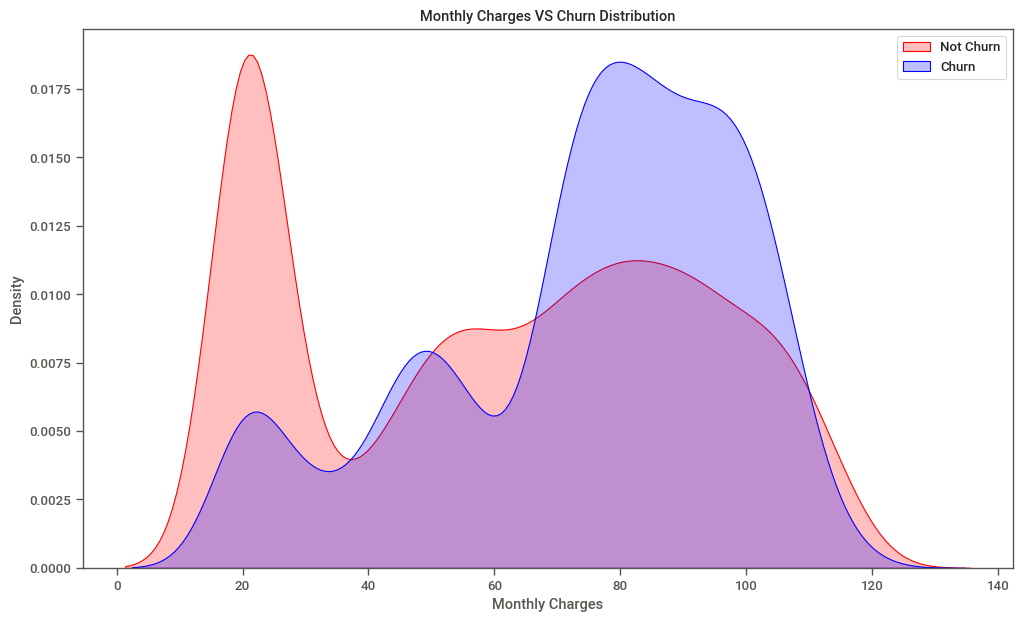

In [ ]:
plt.rcParams['figure.figsize']=(12,7)

sns.set_context("paper",font_scale=1.1)

ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Monthly Charges VS Churn Distribution');



* High Monthly Charges are also one of a reason which makes Customers more likely to churn

### B) Total Charges VS Churn

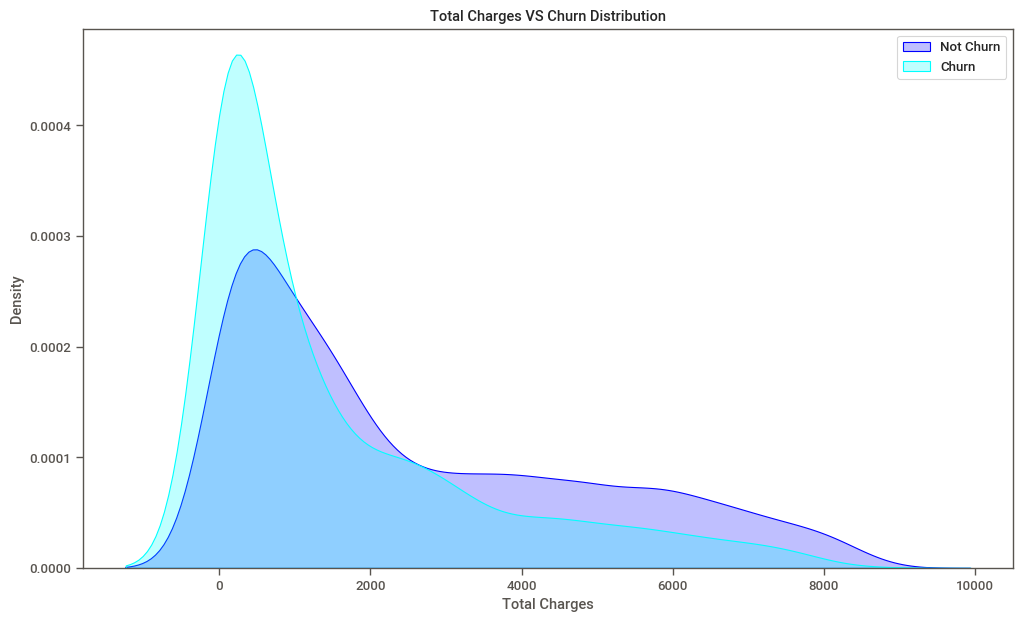

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
                color="blue", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                ax =ax, color="cyan", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Total Charges VS Churn Distribution');

* High Total Charges are also one of a reason which makes Customers more likely to churn,there might be an issue with pricing system which needs to addressed


### C) Tenure VS Churn Boxplot

In [ ]:
fig = px.box(df, x='Churn', y = 'tenure')
# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn Boxplot</b>',
)

fig.show()


### D) Correlation Graph

In [ ]:
#optional

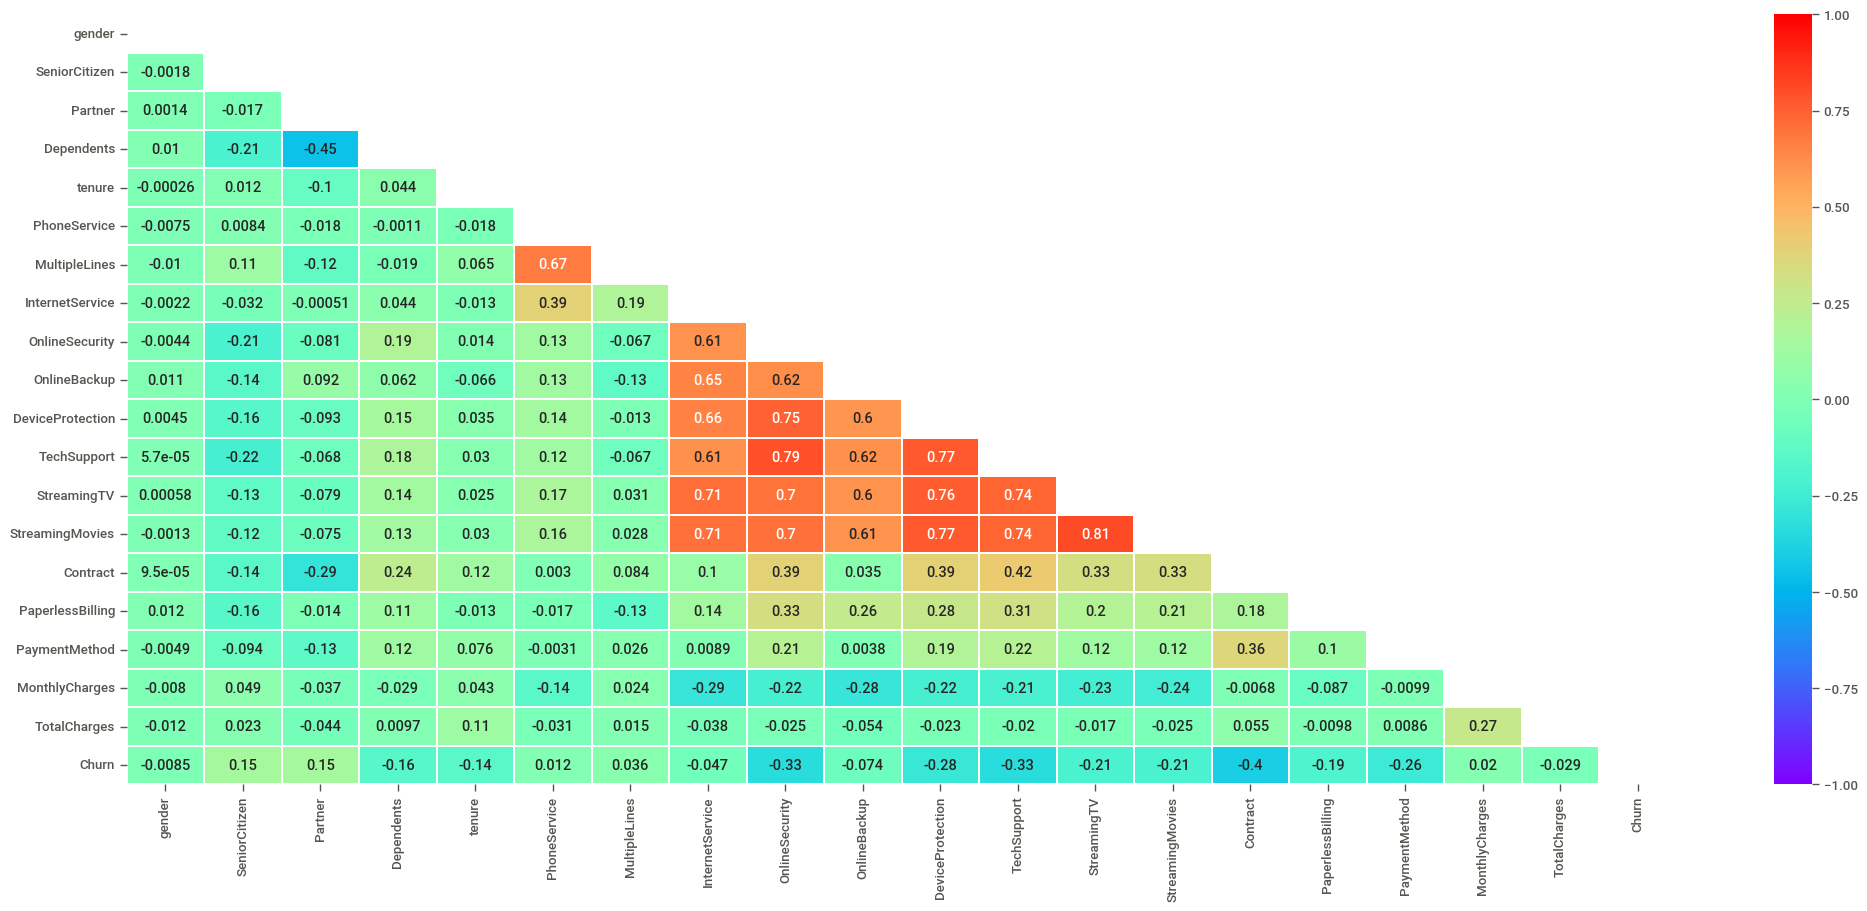

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='rainbow', vmin=-1, vmax=1)

___

<a id = "10" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Data Preprocessing</span>
<a id = "datapreprocessing" ></a>


<a id = "1111" ></a>
### A) Splitting the data into train and test sets
<a id = "Split" ></a>

In [ ]:
# Defining a Function to Convert Objects to Int
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df2 = df
df = df.apply(lambda x: object_to_int(x))
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

Distribution Graph Before Scaling


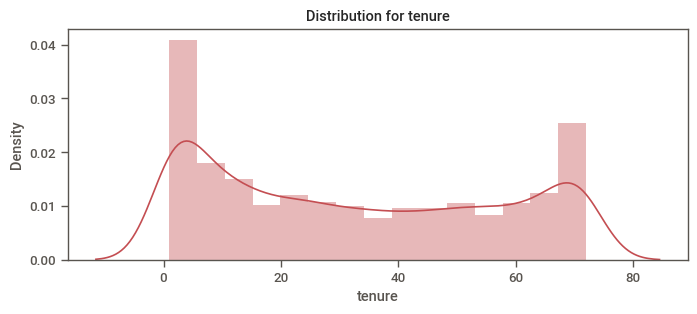

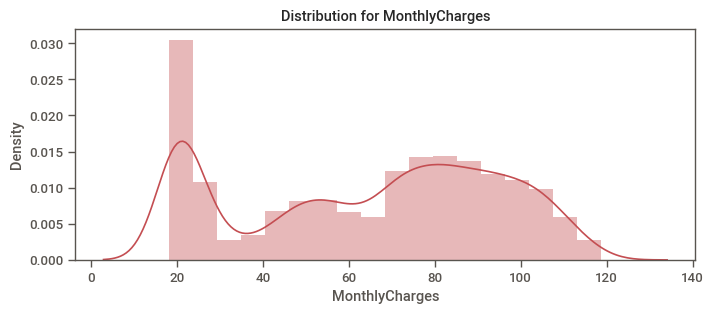

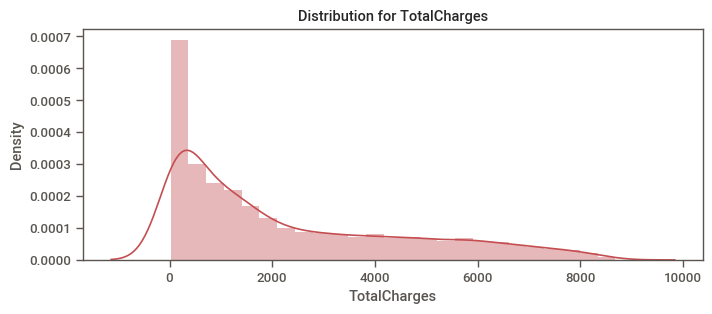

In [ ]:
print('Distribution Graph Before Scaling')
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Because the numerical features are distributed over different value ranges, we will use standard scalar to scale to same range.

<a id = "111" ></a>
### B) Standardizing Numerical Features
<a id = "Standardizing" ></a>

Distribution Graph After Scaling


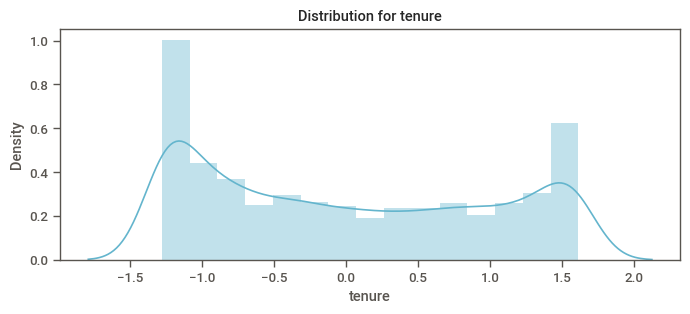

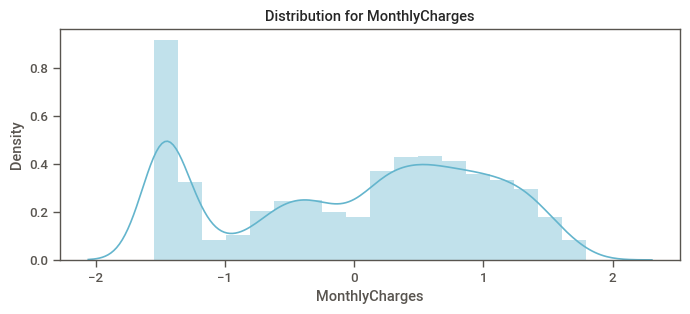

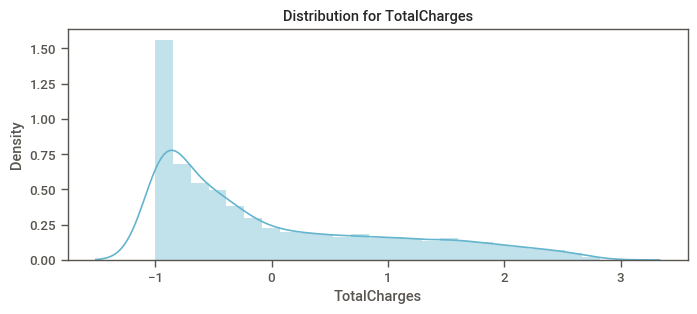

In [ ]:
print('Distribution Graph After Scaling')

df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [ ]:
# Divide the columns into 3 categories for standardisation,label encoding and for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5664,0,1,0,0,-0.920003,1,0,1,0,0,2,0,0,2,0,1,1,0.660740,-0.627323
101,0,0,1,1,-1.285952,1,0,2,1,1,1,1,1,1,0,0,2,-1.493677,-0.997048
2621,1,0,1,0,1.560322,1,0,0,0,2,2,2,2,2,2,1,1,0.478863,1.426156
392,0,1,0,0,-1.245291,1,0,0,0,0,0,0,0,0,0,1,2,-0.671923,-0.966526
1327,1,0,1,0,1.072389,1,2,1,0,0,2,0,2,2,1,1,0,1.153462,1.599308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,0,0,1,1,1.560322,1,2,0,2,2,2,2,2,2,2,0,0,0.836004,1.766058
1730,1,0,0,0,-1.285952,1,2,0,0,0,0,0,2,0,0,1,2,-0.157707,-0.979395
4086,0,0,1,0,1.600983,1,2,0,2,2,2,2,2,0,2,0,1,0.482170,1.354951
2259,0,0,0,0,-1.001325,1,0,2,1,1,1,1,1,1,2,0,3,-1.447381,-0.934911


In [ ]:
#fir- fit is for directly fiting any library in any data
#transform=directly transforming the things in real data
#fit_transform=is a combination of both if you want to apply library and change in real data

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> 7. Multiple Machine Learning Model Evaluations and Testing</span>
<a id = "modelprediction" ></a>
<a id = "102" ></a>
<span style="font-family:serif; font-size:20px;">
<a id = "svc" ></a>

<a id = "103" ></a>
<span style="font-family:serif; font-size:20px;"> II) RANDOM FOREST CLASSIFIER</span>
<a id = "rf" ></a>

In [ ]:
model_rf = RandomForestClassifier(n_estimators=1000 ,
                                  random_state =65, max_features = "auto",
                                  max_leaf_nodes = 35)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))
print('-')

print(classification_report(y_test, prediction_test))
print('-')



0.7782515991471215
-
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       999
           1       0.68      0.45      0.54       408

    accuracy                           0.78      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.77      0.78      0.76      1407

-


<a id = "104" ></a>
#### <b></b>
<span style="font-family:serif; font-size:20px;"> III) LOGISTIC REGRESSION</span>

<a id = "lr" ></a>

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
print('-'*60)

lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)



Logistic Regression accuracy is : 0.7924662402274343
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.79      1407



<a id = "105" ></a>

<span style="font-family:serif; font-size:20px;">III) DECISION TREE CLASSIFIER</span>

<a id = "dtc" ></a>

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

print(classification_report(y_test, predictdt_y))

Decision Tree accuracy is : 0.7057569296375267
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       999
           1       0.49      0.53      0.51       408

    accuracy                           0.71      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.71      0.71      0.71      1407



Decision tree gives very low score.

<a id = "15" ></a>
# <span style="font-family:serif; font-size:28px;">Conclusion:</span>
<a id = "modelprediction" ></a>

From the Above models, we can say that the **Random Forest Model** performs much better than the other models.
Customer churn economically decreases the company's funds and affects it's profitability.

Analysis in Operational Level would help the management to find which departments or services is causing the customer to churn out. Based on identifying the issue, ample of  strategies can be implemented to eliminate customer churn. Identifying customers who are at risk of churning and working to improve their experience and the quality service would help in building customer loyalty.

In [ ]:
prediction_test

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
y_test

array([0, 0, 1, ..., 1, 0, 1])